In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

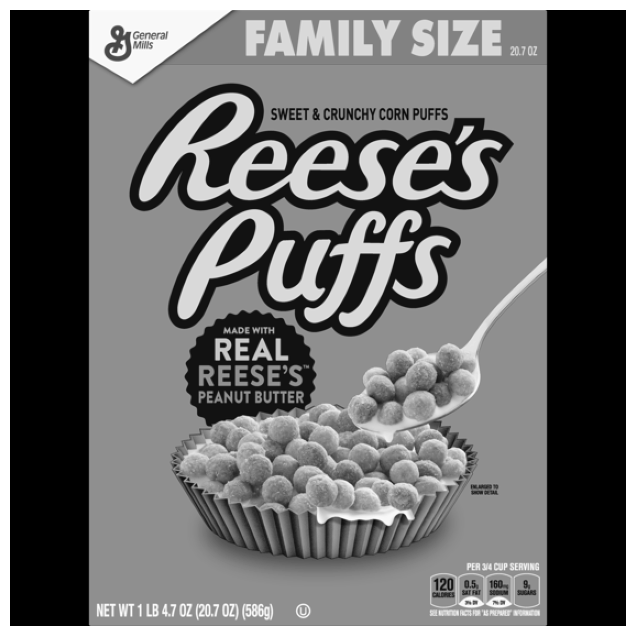

In [3]:
reeses_puff_img_gray = cv2.imread('Data/reeses_puffs.png', 0)

display_img(reeses_puff_img_gray)

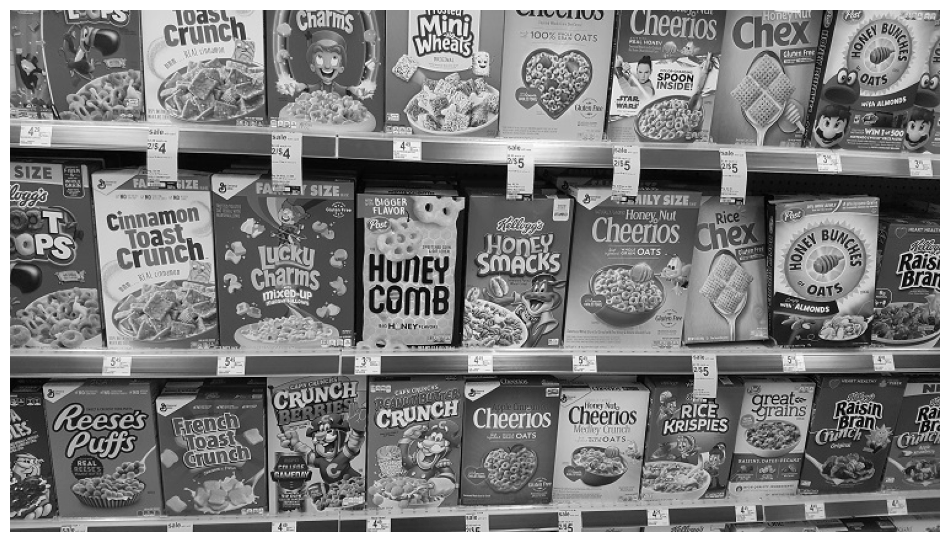

In [4]:
cereals_img_gray = cv2.imread('Data/many_cereals.jpg', 0)

display_img(cereals_img_gray)

## FEATURE MATCHING:

### FLANN BASED MATCHER:

In [5]:
#extracts defining key featurees from an input image.
#using corner, edge, contour detection

#but template matching - exact same object in image
#FLANN matcher - allows to draw clear images but faster not best matches

#creating a SIFT object
sift = cv2.xfeatures2d.SIFT_create()


[ WARN:0@11.633] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [6]:
sift

< cv2.SIFT 0x1196af710>

In [7]:
#keypoints and descriptors for this detector object
kp_rp, desc_rp = sift.detectAndCompute(reeses_puff_img_gray, None)
kp_cr, desc_cr = sift.detectAndCompute(cereals_img_gray, None)

In [8]:
kp_rp

(< cv2.KeyPoint 0x119284420>,
 < cv2.KeyPoint 0x11948f420>,
 < cv2.KeyPoint 0x1197bf570>,
 < cv2.KeyPoint 0x1197bff90>,
 < cv2.KeyPoint 0x1197bec40>,
 < cv2.KeyPoint 0x119787ab0>,
 < cv2.KeyPoint 0x119785f80>,
 < cv2.KeyPoint 0x1197879c0>,
 < cv2.KeyPoint 0x119785e30>,
 < cv2.KeyPoint 0x119785e60>,
 < cv2.KeyPoint 0x119741bc0>,
 < cv2.KeyPoint 0x119741320>,
 < cv2.KeyPoint 0x119742430>,
 < cv2.KeyPoint 0x119742be0>,
 < cv2.KeyPoint 0x119741800>,
 < cv2.KeyPoint 0x1197417d0>,
 < cv2.KeyPoint 0x119741a10>,
 < cv2.KeyPoint 0x1197406f0>,
 < cv2.KeyPoint 0x119740630>,
 < cv2.KeyPoint 0x1197411a0>,
 < cv2.KeyPoint 0x119740990>,
 < cv2.KeyPoint 0x1197407e0>,
 < cv2.KeyPoint 0x1197408a0>,
 < cv2.KeyPoint 0x119741170>,
 < cv2.KeyPoint 0x119741140>,
 < cv2.KeyPoint 0x119741110>,
 < cv2.KeyPoint 0x1197410e0>,
 < cv2.KeyPoint 0x1197410b0>,
 < cv2.KeyPoint 0x119741080>,
 < cv2.KeyPoint 0x119740510>,
 < cv2.KeyPoint 0x119740540>,
 < cv2.KeyPoint 0x119740420>,
 < cv2.KeyPoint 0x119740450>,
 < cv2.Key

In [9]:
kp_cr

(< cv2.KeyPoint 0x11972c930>,
 < cv2.KeyPoint 0x11972c960>,
 < cv2.KeyPoint 0x11972c990>,
 < cv2.KeyPoint 0x11972c9c0>,
 < cv2.KeyPoint 0x11972c9f0>,
 < cv2.KeyPoint 0x11972ca20>,
 < cv2.KeyPoint 0x11972ca50>,
 < cv2.KeyPoint 0x11972ca80>,
 < cv2.KeyPoint 0x11972cab0>,
 < cv2.KeyPoint 0x11972cae0>,
 < cv2.KeyPoint 0x11972cb10>,
 < cv2.KeyPoint 0x11972cb40>,
 < cv2.KeyPoint 0x11972cb70>,
 < cv2.KeyPoint 0x11972cba0>,
 < cv2.KeyPoint 0x11972cbd0>,
 < cv2.KeyPoint 0x11972cc00>,
 < cv2.KeyPoint 0x11972cc30>,
 < cv2.KeyPoint 0x11972cc60>,
 < cv2.KeyPoint 0x11972cc90>,
 < cv2.KeyPoint 0x11972ccc0>,
 < cv2.KeyPoint 0x11972ccf0>,
 < cv2.KeyPoint 0x11972cd20>,
 < cv2.KeyPoint 0x11972cd50>,
 < cv2.KeyPoint 0x11972cd80>,
 < cv2.KeyPoint 0x11972cdb0>,
 < cv2.KeyPoint 0x11972cde0>,
 < cv2.KeyPoint 0x11972ce10>,
 < cv2.KeyPoint 0x11972ce40>,
 < cv2.KeyPoint 0x11972ce70>,
 < cv2.KeyPoint 0x11972cea0>,
 < cv2.KeyPoint 0x11972ced0>,
 < cv2.KeyPoint 0x11972cf00>,
 < cv2.KeyPoint 0x11972cf30>,
 < cv2.Key

In [10]:
desc_rp

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [11]:
desc_cr

array([[ 0.,  0.,  0., ...,  5.,  1.,  6.],
       [72., 41.,  0., ...,  6.,  0., 13.],
       [ 3.,  1.,  1., ...,  0.,  1., 17.],
       ...,
       [20.,  7., 35., ...,  0.,  0.,  0.],
       [ 4., 54., 81., ...,  0.,  0.,  0.],
       [32.,  2.,  5., ..., 35., 56., 25.]], dtype=float32)

In [12]:
desc_rp.shape

(1501, 128)

In [13]:
desc_cr.shape

(3744, 128)

In [14]:
type(kp_cr)

tuple

In [15]:
#now using flann based  (parameters and tree)

FLANN_INDEX_KDTREE = 0

index_params = dict(algorithm=FLANN_INDEX_KDTREE, tree=5)
#using tree to find best matches 

index_params

{'algorithm': 0, 'tree': 5}

In [16]:
#now playing with parameters

search_params = dict(checks=50)

search_params

{'checks': 50}

In [17]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [18]:
flann

< cv2.FlannBasedMatcher 0x1196afdf0>

In [19]:
matches = flann.knnMatch(desc_rp, desc_cr, k=2)

In [20]:
matches

((< cv2.DMatch 0x106af2710>, < cv2.DMatch 0x106af0d10>),
 (< cv2.DMatch 0x1196afdd0>, < cv2.DMatch 0x1196af9f0>),
 (< cv2.DMatch 0x1196af550>, < cv2.DMatch 0x1196aff90>),
 (< cv2.DMatch 0x1196af2f0>, < cv2.DMatch 0x1196afb30>),
 (< cv2.DMatch 0x1196aff70>, < cv2.DMatch 0x1196afa90>),
 (< cv2.DMatch 0x1196af510>, < cv2.DMatch 0x1196aff50>),
 (< cv2.DMatch 0x1196af330>, < cv2.DMatch 0x1196afdb0>),
 (< cv2.DMatch 0x1196af890>, < cv2.DMatch 0x119732170>),
 (< cv2.DMatch 0x119732110>, < cv2.DMatch 0x119732150>),
 (< cv2.DMatch 0x119733930>, < cv2.DMatch 0x119733b30>),
 (< cv2.DMatch 0x1197338b0>, < cv2.DMatch 0x119733a50>),
 (< cv2.DMatch 0x119733830>, < cv2.DMatch 0x119733af0>),
 (< cv2.DMatch 0x119733ad0>, < cv2.DMatch 0x119733990>),
 (< cv2.DMatch 0x119733a10>, < cv2.DMatch 0x119733ab0>),
 (< cv2.DMatch 0x119733950>, < cv2.DMatch 0x119733b70>),
 (< cv2.DMatch 0x119733b50>, < cv2.DMatch 0x119731330>),
 (< cv2.DMatch 0x119733910>, < cv2.DMatch 0x119733a90>),
 (< cv2.DMatch 0x119733c50>, < 

In [21]:
len(matches)

1501

In [22]:
#now we have 2 nearest neighbors in each one

#now applying ratio test - finding ones with closest distance
#close - descriptor is good match else bad match(can consider that match else no)

good = []
#list to only have good values

for match1, match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])

        
print(len(good))



79


In [23]:
good

[[< cv2.DMatch 0x106af2710>],
 [< cv2.DMatch 0x1197300f0>],
 [< cv2.DMatch 0x119733e90>],
 [< cv2.DMatch 0x119733ed0>],
 [< cv2.DMatch 0x119818110>],
 [< cv2.DMatch 0x119818710>],
 [< cv2.DMatch 0x119818a10>],
 [< cv2.DMatch 0x119818b90>],
 [< cv2.DMatch 0x119818f10>],
 [< cv2.DMatch 0x119819150>],
 [< cv2.DMatch 0x119819510>],
 [< cv2.DMatch 0x119819610>],
 [< cv2.DMatch 0x11981a890>],
 [< cv2.DMatch 0x11981a8d0>],
 [< cv2.DMatch 0x11981a9d0>],
 [< cv2.DMatch 0x11981b750>],
 [< cv2.DMatch 0x11981c110>],
 [< cv2.DMatch 0x11981c1d0>],
 [< cv2.DMatch 0x11981c290>],
 [< cv2.DMatch 0x11981cb10>],
 [< cv2.DMatch 0x11981cc50>],
 [< cv2.DMatch 0x11981dd50>],
 [< cv2.DMatch 0x11981de90>],
 [< cv2.DMatch 0x11981ded0>],
 [< cv2.DMatch 0x11981e090>],
 [< cv2.DMatch 0x11981e0d0>],
 [< cv2.DMatch 0x11981f2d0>],
 [< cv2.DMatch 0x11981f450>],
 [< cv2.DMatch 0x11981f490>],
 [< cv2.DMatch 0x11981fa50>],
 [< cv2.DMatch 0x11981fb50>],
 [< cv2.DMatch 0x11981fc10>],
 [< cv2.DMatch 0x119820210>],
 [< cv2.DM

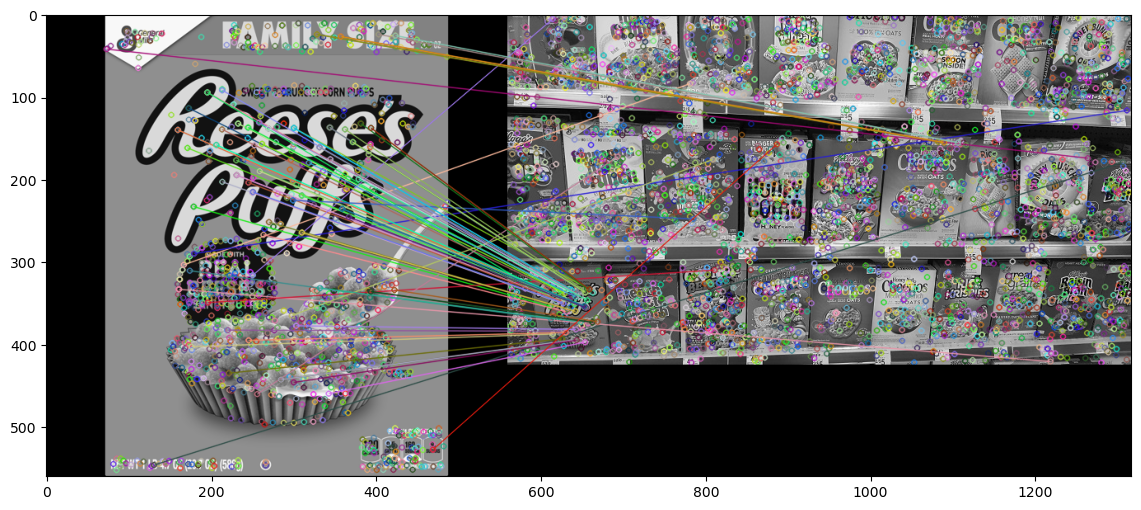

In [24]:
#lot of bad matches removed

#now drawing the best matches

#flagg - 0 shows all feastures that matches but only drwas best one

flann_matches = cv2.drawMatchesKnn(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_cr, good, None, flags=0)


fig = plt.figure(figsize=(14,9))
plt.imshow(flann_matches)
plt.show()
plt.close()

In [26]:
#kind of fast match but not good match

#cfreating mask:
matches_mask = [[0,0] for i in range(len(matches))]

matches_mask

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [27]:
#mask has all 0's for 2 points same as len as matches

#now we have 2 nearest neighbors in each one

#now applying ratio test - finding ones with closest distance
#close - descriptor is good match else bad match(can consider that match else no)

for i, (match1, match2) in enumerate(matches):
    if match1.distance<0.75*match2.distance:
        matches_mask[i] = [1,0]
        #if match found (good) at that index

        
print(len(matches_mask))



1501


In [28]:
matches_mask

[[1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [29]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0), matchesMask=matches_mask, flags=0)

#matchColor - line color if matched
#singlePointColor - point color



In [30]:
draw_params

{'matchColor': (0, 255, 0),
 'singlePointColor': (255, 0, 0),
 'matchesMask': [[1, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [1, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [1, 0],
  [1, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [1, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [

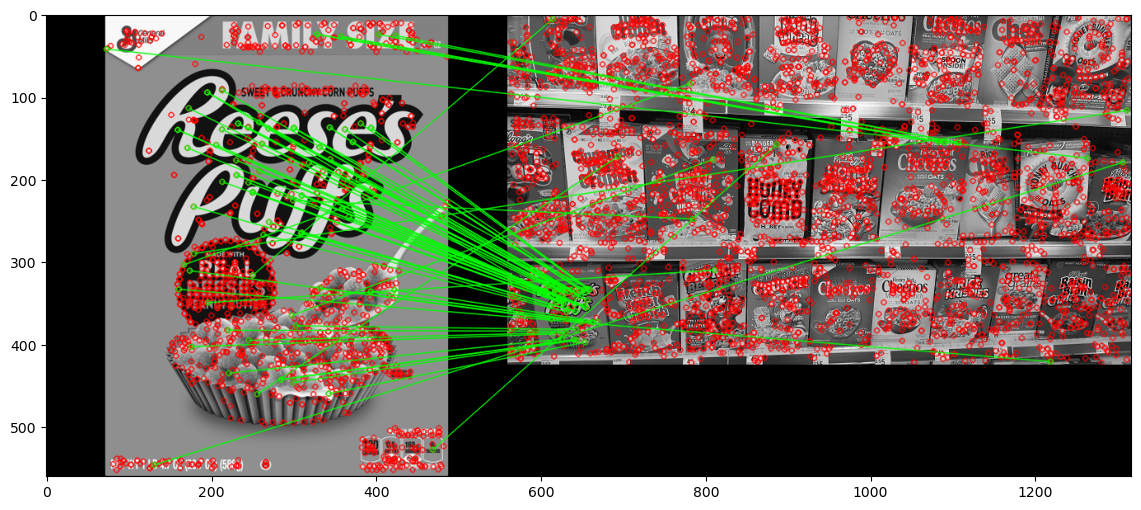

In [31]:
flann_matches_msk = cv2.drawMatchesKnn(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_cr, matches, None, **draw_params)

#draw_params has all params good match, flag, colorings

fig = plt.figure(figsize=(14,9))
plt.imshow(flann_matches_msk)
plt.show()
plt.close()